# Astro 5205 Project 4

### Matt Lastovka and Sam Eckart

## The planet we will analyze is Trappist-1e

In [1]:
import pandas as pd                     # Required for reading the .csv from NEA
import astropy                          # Useful package for working with astronomy specific units and constants
from astropy import units as u                # Submodule of astropy
from astropy import constants as c            #
import numpy as np                      # Useful mathematical functions
import matplotlib.pyplot as plt         # Required for plotting data

In [2]:
# Create a dictionary with updated parameters for
# the default matplotlib style.

style_revisions = {
 'axes.linewidth':  1.5, 
 'xtick.top' : True,         
 'ytick.right' :  True,
 'xtick.direction' : 'in',    
 'ytick.direction' : 'in', 
 'xtick.major.size' : 11,     
 'ytick.major.size' : 11,
 'xtick.minor.size' : 5.5,    
 'ytick.minor.size' : 5.5,      
 'font.size' : 16,              
 'figure.figsize' : [13.125, 8.3125], 
 'lines.linewidth' : 2.      
}

# Update the matplotlib dictionary.
plt.rcParams.update(style_revisions)

### Finding Stellar Abundances for Trappist-1

I found the value of $[Fe/H] = 0.0535 \pm 0.088$ ([source](https://ui.adsabs.harvard.edu/abs/2020A%26A...640A.112D/abstract)). 

Then, I used [Griffith, et al. (2021)](https://iopscience.iop.org/article/10.3847/1538-4357/abd6be/pdf) to scale $[Fe/H]$ to $[Mg/Fe]$ and $[Si/Fe]$. Specifically using Figure 3, I found that $[Mg/Fe] \approx 0.12$ and $[Si/Fe] \approx 0.05$.

Now, I want to convert these to the mole ratios, $Fe/Mg$ and $Si/Mg$. 

In [3]:
FeH_t = 0.0535
MgFe_t = 0.12
SiFe_t = 0.05

MgH_t = FeH_t + MgFe_t
SiH_t = FeH_t + SiFe_t

print("Fe/H =", FeH_t)
print("Mg/H =", MgH_t)
print("Si/H =", SiH_t)

Fe/H = 0.0535
Mg/H = 0.1735
Si/H = 0.10350000000000001


To do that, we will need the solar abundances of these elements. Using [Lodders (2019)](https://arxiv.org/pdf/1912.00844.pdf), I find these solar abundances (given as $12+\log{(X/H)}$, where $X$ is each element)

$$
Fe: 7.52, \,\,\,\,\, Mg: 7.50, \,\,\,\,\, Si: 7.52
$$

To convert this to the mole ratio, I invert the equation about, which gives

$$
X/H = 10^{a - 12}
$$

where $a$ is the abundance of each element as quoted above.

In [4]:
def log_to_mole(a):
    return 10**(a - 12)

FeH_log_sun = 7.52
MgH_log_sun = 7.50
SiH_log_sun = 7.52

FeH_mole_sun = log_to_mole(FeH_log_sun)
MgH_mole_sun = log_to_mole(MgH_log_sun)
SiH_mole_sun = log_to_mole(SiH_log_sun)

print("Fe/H =", FeH_mole_sun)
print("Mg/H =", MgH_mole_sun)
print("Si/H =", SiH_mole_sun)

Fe/H = 3.3113112148259076e-05
Mg/H = 3.1622776601683795e-05
Si/H = 3.3113112148259076e-05


To convert the log abundances of Trappist-1, as reported above, to mole ratio, use the following equation:

$$
\frac{X}{H} = 10^{[X/H]}\left(\frac{X}{H}\right)_{\odot}
$$

The mole ratios we really want are Fe/Mg and Si/Mg. To get these, use:

$$
\frac{Fe}{Mg} = \frac{Fe/H}{Mg/H} \,\,\,\,\,\,\,\,\,\,\,\, \frac{Si}{Mg} = \frac{Si/H}{Mg/H}
$$

In [5]:
def logsol_to_mole(a, b):
    return b*10**(a)

FeH_mole_t = logsol_to_mole(FeH_t, FeH_mole_sun)
MgH_mole_t = logsol_to_mole(MgH_t, MgH_mole_sun)
SiH_mole_t = logsol_to_mole(SiH_t, SiH_mole_sun)

FeMg_t = FeH_mole_t / MgH_mole_t
SiMg_t = SiH_mole_t / MgH_mole_t

print("Fe/Mg =", FeMg_t)
print("Si/Mg =", SiMg_t)

Fe/Mg = 0.7943282347242806
Si/Mg = 0.8912509381337447


# ExoPlex Stuff

Using ExoPlex, we start with compositions and mass, then calculate the interior structure and radius of the planet. We will start by assuming the planet abundance is the same as the stellar abundance.

## Stellar Abundance

#### inputs: --mass=0.629 --FeMg=0.79 --SiMg=0.89

Core composition:  {'Fe': 100.0, 'Si': 0.0, 'O': 0.0, 'S': 0.0}

Mantle composition:  {'FeO': 0.0, 'SiO2': 52.27629036, 'MgO': 39.40109676, 'CaO': 3.83734622, 'Al2O3': 4.48526666}

Mantle Fe# -0.0

Core Mass Percent =  30.132

Mass =  0.692 Earth masses

Radius =  0.905 Earth radii

Core Mass Fraction =  30.27

Core Radius Fraction =  51.67

CMB Pressure =  104.09 GPa

number of oceans: 0.00

<img src="trappits1e_stellar.png" alt="Alternative text" />

## Adjust parameters to reproduce the known planetary radius

#### These are the ExoPlex output parameters when we reproduce the correct planetary radius. The input values were --mass=0.692 --FeMg=0.56 --SiMg=0.89

Core composition:  {'Fe': 100.0, 'Si': 0.0, 'O': 0.0, 'S': 0.0}

Mantle composition:  {'FeO': 0.0, 'SiO2': 52.27629036, 'MgO': 39.40109676, 'CaO': 3.83734622, 'Al2O3': 4.48526666}

Mantle Fe# -0.0

Core Mass Percent =  23.414

Mass =  0.692 Earth masses

Radius =  0.920 Earth radii

Core Mass Fraction =  23.57

Core Radius Fraction =  46.89

CMB Pressure =  109.37 GPa

number of oceans: 0.00

<img src="trappits1e_fixed.png" alt="Alternative text" />

In [6]:
stellar_profile = pd.read_csv("high_wFEO_Radius_0.91.tsv", sep='\t')
planet_profile = pd.read_csv("high_wFEO_Radius_0.92.tsv", sep='\t')

In [7]:
rad_s = stellar_profile["Radius"]
den_s = stellar_profile["Density"]
rad_p = planet_profile["Radius"]
den_p = planet_profile["Density"]

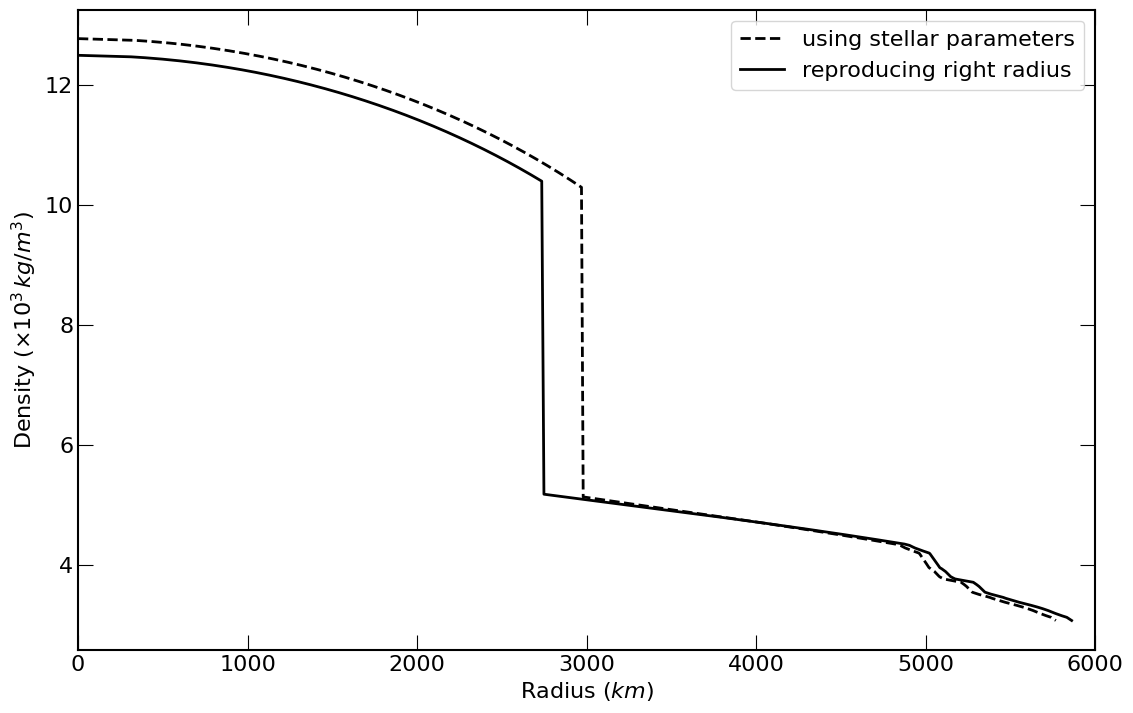

In [8]:
plt.plot(rad_s, den_s, '--k', label="using stellar parameters")
plt.plot(rad_p, den_p, 'k', label="reproducing right radius")
plt.xlabel(r"Radius ($km$)")
plt.ylabel(r"Density ($\times 10^3 \, kg/m^3$)")
plt.xlim(0, 6000)
plt.legend()
plt.show()

Parameters of Trappist-1e

$$
R = 0.920 \pm 0.012 R_{⊕} \,\,\,\,\,\,\,\,\, M = 0.692 \pm 0.022 M_{\oplus} \,\,\,\,\,\,\,\,\,\,\,\, a = 0.02925 \pm 0.012 AU
$$

### Comparing Trappist-1e Characteristics to a Known Terrestrial Planet

In order to do this, we can look to the work done in previous projects -- specifically with respect to comparing planet density and semimajor axis which are the known values above that were collected from ExoPlex.

In [9]:
PData = pd.read_csv("PS_2023.01.26_13.12.40.csv", skiprows=100) 

By reading in the exoplanet archive data, we can begin comparing Trappist-1e to other exoplanets, as well as the *very* well known rocky planet, Earth.

First, we need to create a new column in the dataframe for the exoplanet density, and define Trappist-1e's in terms of kg/m^3.

In [10]:
PData['Density'] = (PData['pl_bmasse'] * (5.972 * 10**(24))) / ((4 / 3) * np.pi * ((PData['pl_rade']) * (6.378 * 10**(6)))**3)

Trappist1eD = (0.692 * (5.972 * 10**(24))) / ((4 / 3) * np.pi * ((0.920) * (6.378 * 10**(6)))**3)

#Print Trappist-1e's density in kg/m^3
Trappist1eD

4883.377045476343

Now we can simply plot this comparison.

<function matplotlib.pyplot.show(close=None, block=None)>

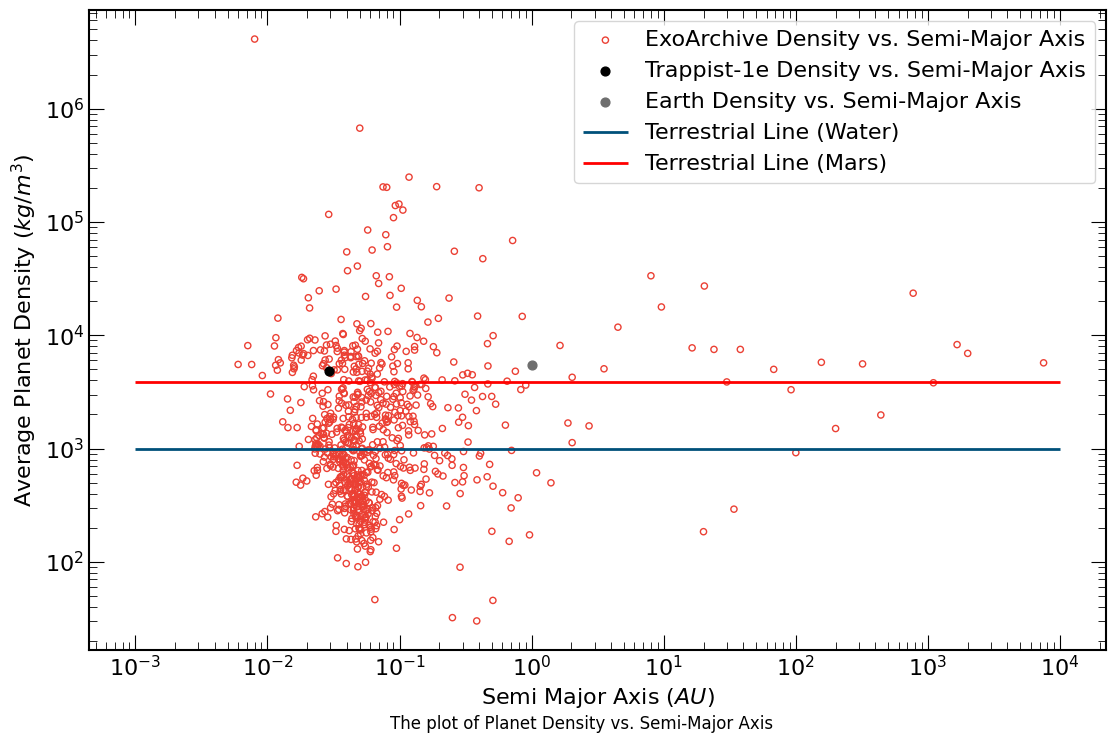

In [11]:
plt.scatter(x = PData.pl_orbsmax, y = PData.Density, s=20, facecolors='none', edgecolors='#eb4034', label="ExoArchive Density vs. Semi-Major Axis")
plt.scatter(x = 0.02925, y = Trappist1eD, s=40, facecolors='#000000', edgecolors='#000000', label="Trappist-1e Density vs. Semi-Major Axis")
plt.scatter(x = 1, y = 5510, s=40, facecolors='#6e6e6e', edgecolors='#6e6e6e', label="Earth Density vs. Semi-Major Axis")

plt.hlines(y = 1000, xmin = 0.001, xmax = 10000, colors = '#00507a', label="Terrestrial Line (Water)")
plt.hlines(y = 3900, xmin = 0.001, xmax = 10000, colors = '#FF0000', label="Terrestrial Line (Mars)")
            
plt.legend(loc='upper right')
            
plt.xlabel('Semi Major Axis ($AU$)')                               # Create a plot label for the x-axis
plt.ylabel('Average Planet Density ($kg/m^3$)')                            # Create a plot label for the y-axis
plt.figtext(0.5, 0.015,"The plot of Planet Density vs. Semi-Major Axis", # Create plot caption
                     wrap=True,horizontalalignment='center', fontsize=12)
plt.yscale('log')                                                          # Change y-scale to log
plt.xscale('log')                                                          # Change x-scale to log
plt.show                                                                   # Output the plot

Before explaining anything specific, let's discuss the location of the "Terrestrial Line (Water)." In this plot, it is placed at 1000kg/m^3 as this is the density of water (also could be given as 1 g/cm^3). Typically, anything less dense is assumed to be gaseous, or porous enough for the gas it contains to bring the average density to less than that of water. That being said, this is a huge generalisation -- even several of the "Gas Giants" in our solar system are more dense than water, and they are far from what we might mean by "terrestrial." This is where "Terrestrial Line (Mars)" comes in. If we assume Mars has the *minimum* average density required to have a solid surface -- which is, itself, still innacurate -- then we can see that Trappist-1e is *very* likely solid on its surface 

As we can see, Trappist-1e is not only closer to its host star than Earth is to the sun, it is also ever so slightly less dense at 4883.377 kg/m^3 or 4.883 g/cm^3 -- for reference, the Earth's average density is 5.51 g/cm^3. 

So, Trappist-1e is clearly terrestrial, barring some impractically dense core. That being said, we cannot make a clear comment on the solar irradiance of Trappist-1e until we compare it to the Earth's. 

Let's put this "solar irradiance" value into context. The Earth's average solar irradiance is ~1360 W/m^2, and it is calculated by using the sun's luminosity, L, and the distance the earth is from the sun -- the semi-major axis -- with,

$$
SI = \frac{L}{4\pi a^2}
$$

For Trappist-1, the luminosity comes in at a weak 0.000553 solar luminosities. While this may seem irrecoverable, it is also just about forty times closer to its host star than Earth is to the sun -- these two values may actually be closer than is first expected.

In [12]:
#Earth Calculation

LS = 1
aE = 1
SIE = (LS * 3.846 * 10**26) / (4 * np.pi * (aE * 1.496 * 10**11)**2)

#Mars Calculation

aM = 1.52368055 
SIM = (LS * 3.846 * 10**26) / (4 * np.pi * (aM * 1.496 * 10**11)**2)

#Trappist Calculation

LTrapp = 0.000553 # In units of LS
aTrapp = 0.02925
SITrapp = (LTrapp * 3.846 * 10**26) / (4 * np.pi * (aTrapp * 1.496 * 10**11)**2)

PDiffTE = (SITrapp) / (SIE) * 100

PDiffTM = (SITrapp) / (SIM) * 100

print("Earth's Solar Irradiance is: ", SIE, "W/m^2\nMars's Solar Irradiance is: ", SIM, "W/m^2\nTrappist-1e's Solar Irradiance is: ", SITrapp, "W/m^2\nTrappist-1e receives ", 
      PDiffTE, "% of the power per unit area that Earth does.", "\nTrappist-1e receives ", PDiffTM, 
     "% of the power per unit area that Mars does.")

Earth's Solar Irradiance is:  1367.52800500852 W/m^2
Mars's Solar Irradiance is:  589.0448744115884 W/m^2
Trappist-1e's Solar Irradiance is:  883.9131995262896 W/m^2
Trappist-1e receives  64.63583899481333 % of the power per unit area that Earth does. 
Trappist-1e receives  150.05872012879368 % of the power per unit area that Mars does.


Despite Trappist-1's extremely low luminosity, Trappist-1e sits close enough to it that it is still able to receive nearly 65% of the power per unit area that Earth does. Trappist-1e's surface temperature is hard to pin down -- even the Earth is not so static, and it gets heated evenly due to its rotation. That being said, it could also almost definitely support liquid water. This expectation is hard to grasp with so little time, but the short of it is that Trappist-1e is likely tidally locked, making one face very hot and the other very cold. A band around the planet that straddles these faces may be suitable for liquid water if the atmospheric pressure is great enough to allow water to exist in its liquid state. However, much of this project was done assuming that Trappist-1e has *no* atmosphere to simplify the work. By including an atmosphere, our results would certainly differ from how they are now, and probably by not an insignificant amount.

To just compare the solar irradiance is somewhat problematic due to Trappist-1e likely being tidally locked -- it means nothing much about its habitability or the similarity it has with Earth extending beyond an ambiguous power per unit area measurement.

To aid in understanding this tidally locked scenario, we can determine where the water snow line is located in the Trappist-1 system. The result will be fairly naive, although, it should be an ok guess that at least visualizes an important characteristic of Trappist-1e -- that it resides within the boundary of the snow line. To do this, we use the Stefan-Boltzmann Law

$$
\frac{P}{A} = \sigma T^4
$$

Determining the surface pressure is a little beyond the scope here, so I will just assume it is equal to Earth's -- this shouldn't be a terrible assumption as Trappist-1e has ~93% of Earth's surface gravity -- which makes the freezing point of water on its surface 273.15 K. So, let's find out what semi-major axis can return this value for the temperature. We can investigate the solar irradiance function in a graphing utility and use it's output in this Stefan-Boltzmann Law to determine that roughly ~315 W/m^2 is capable of keeping water on the boundary of liquid and ice. This power per unit area corresponds to a value of 0.049 AU. Generally speaking, though, an exoplanet must be much closer for liquid water to be available on the exoplanet.

<function matplotlib.pyplot.show(close=None, block=None)>

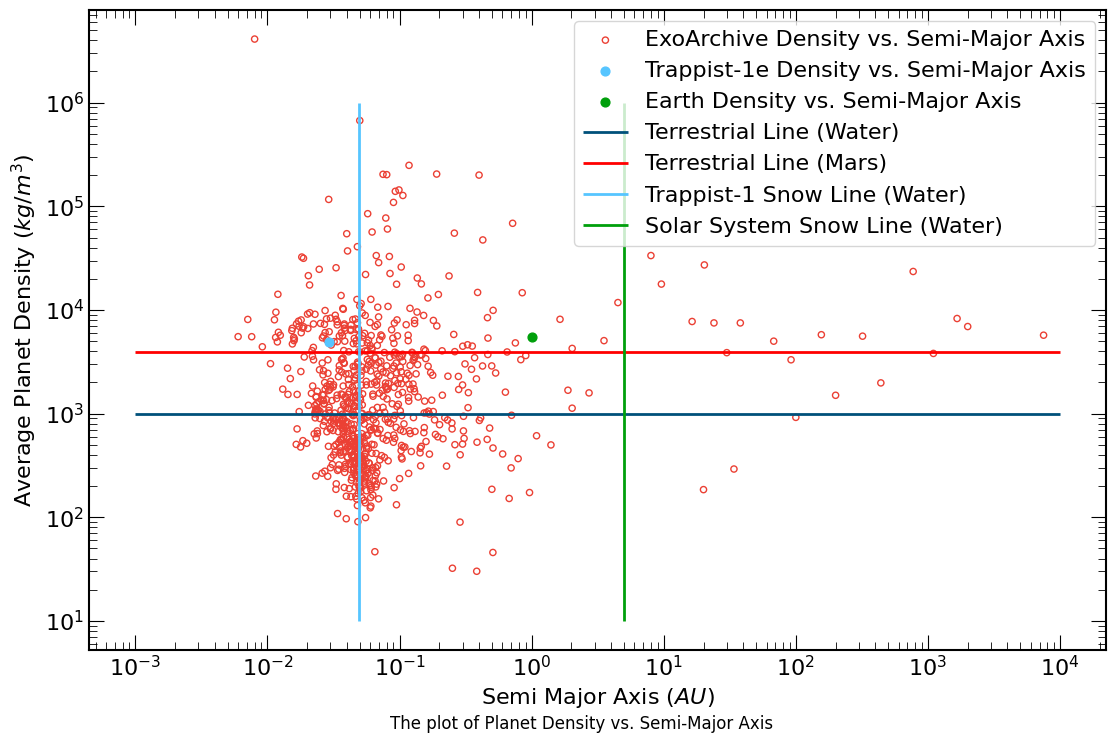

In [13]:
plt.scatter(x = PData.pl_orbsmax, y = PData.Density, s=20, facecolors='none', edgecolors='#eb4034', label="ExoArchive Density vs. Semi-Major Axis")
plt.scatter(x = 0.02925, y = Trappist1eD, s=40, facecolors='#56c5ff', edgecolors='#56c5ff', label="Trappist-1e Density vs. Semi-Major Axis")
plt.scatter(x = 1, y = 5510, s=40, facecolors='#009f0b', edgecolors='#009f0b', label="Earth Density vs. Semi-Major Axis")

plt.hlines(y = 1000, xmin = 0.001, xmax = 10000, colors = '#00507a', label="Terrestrial Line (Water)")
plt.hlines(y = 3900, xmin = 0.001, xmax = 10000, colors = '#FF0000', label="Terrestrial Line (Mars)")
plt.vlines(x = 0.049, ymin = 10, ymax = 1000000, colors = '#56c5ff', label="Trappist-1 Snow Line (Water)")
plt.vlines(x = 5, ymin = 10, ymax = 1000000, colors = '#009f0b', label="Solar System Snow Line (Water)")
            
plt.legend(loc='upper right')
            
plt.xlabel('Semi Major Axis ($AU$)')                               # Create a plot label for the x-axis
plt.ylabel('Average Planet Density ($kg/m^3$)')                            # Create a plot label for the y-axis
plt.figtext(0.5, 0.015,"The plot of Planet Density vs. Semi-Major Axis", # Create plot caption
                     wrap=True,horizontalalignment='center', fontsize=12)
plt.yscale('log')                                                          # Change y-scale to log
plt.xscale('log')                                                          # Change x-scale to log
plt.show   

### Comparing Mantle Mineralogy

From ExoPlex, we are also given plenty of information relating to mantle composition which we can compare to the mantle composiiton of the Earth. To begin, let's consider the core mass fraction (CMF) -- the ratio of the core's mass to the total mass of the planet. Earth has a CMF of ~32.5%, and, as we can see from the ExoPlex output, Trappist-1e has a CMF of ~23.6%. We have assumed that the core of Trappist-1e is pure iron, as this is the most dense element the core of an exoplanet could be assumed to have. In reality, it is probably *mostly* iron, but includes a small but not insignificant percentage of other lighter elements. That being said, Trappist-1e certainly has a less massive core relative to its total mass.

As for the mantle composition, we can create a table of Trappist-1e and Earth mantle composition characteristics, referring to [McDonough and Sun (1994)](https://doi.org/10.1016/0009-2541(94)00140-4) for the earth composition values.

|             | Earth       | Trappist-1e |
| ----------- | ----------- | ----------- |
| FeO         | 8.05        | 0.0         |
| SiO2        | 45.0        | 52.28       |
| MgO         | 37.8        | 39.40       |
| CaO         | 3.55        | 3.84        |
| Al2O3       | 4.45        | 4.49        |

Let's also visualize these in a bar graph to hit home one the similarities.

(-0.5, 10.5)

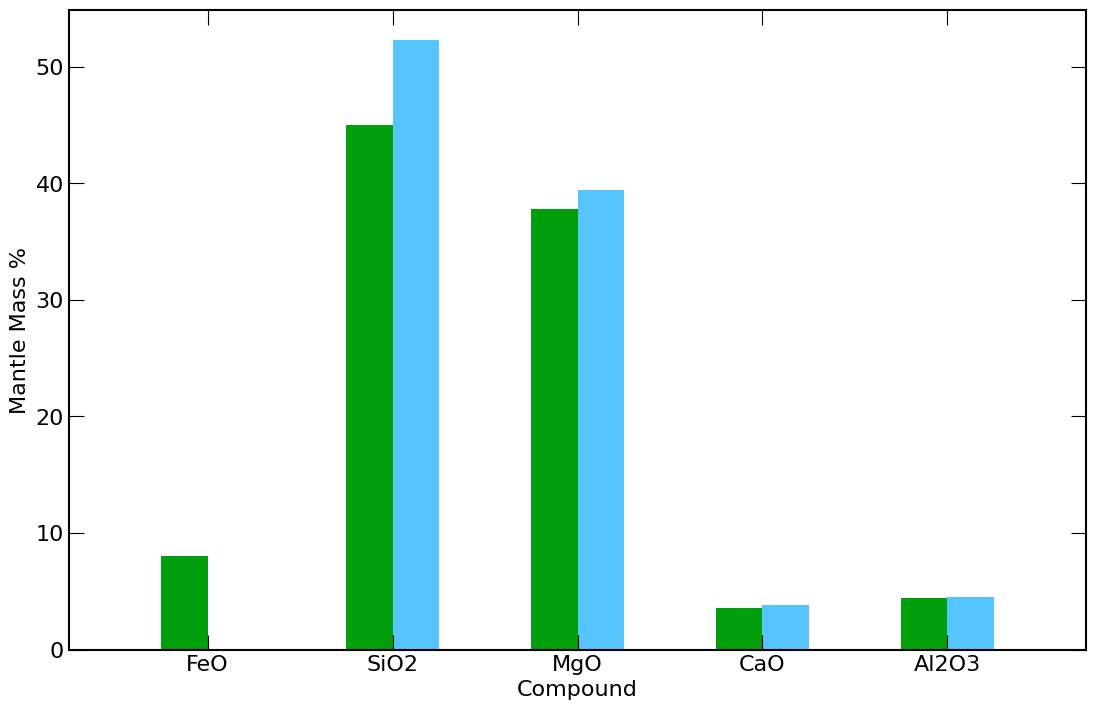

In [14]:
ax = plt.axes()

#Plot compund bars

ax.bar(x=0.5, height=8.05, width=0.5, bottom=0, align='edge', color='#009f0b')
ax.bar(x=1.0, height=0, width=0.5, bottom=0, align='edge', color='#56c5ff')

ax.bar(x=2.5, height=45.0, width=0.5, bottom=0, align='edge', color='#009f0b')
ax.bar(x=3.0, height=52.28, width=0.5, bottom=0, align='edge', color='#56c5ff')

ax.bar(x=4.5, height=37.8, width=0.5, bottom=0, align='edge', color='#009f0b')
ax.bar(x=5.0, height=39.40, width=0.5, bottom=0, align='edge', color='#56c5ff')

ax.bar(x=6.5, height=3.55, width=0.5, bottom=0, align='edge', color='#009f0b')
ax.bar(x=7.0, height=3.84, width=0.5, bottom=0, align='edge', color='#56c5ff')

ax.bar(x=8.5, height=4.45, width=0.5, bottom=0, align='edge', color='#009f0b')
ax.bar(x=9.0, height=4.49, width=0.5, bottom=0, align='edge', color='#56c5ff')

ax.set_xticks([1, 3, 5, 7, 9])
ax.set_xticklabels(['FeO', 'SiO2', 'MgO', 'CaO', 'Al2O3'])

ax.set_xlabel("Compound")
ax.set_ylabel("Mantle Mass %")

plt.xlim(-0.5, 10.5)

From this, it is clear to see that CaO and Al2O3 are very consistent with Earth measurements. We can also see the lack of iron in Trappist-1e's mantle being redistributed as increases in SiO2 and MgO to make up for the mantle mass percentage loss.